In [8]:
from ownlib.data_cleaner import clean_data_from_config

# Clean and import data
results = clean_data_from_config(
    config_path='./config/scraper_config.json',
    processed_base_dir='processed',
    db_path='luxembourg_housing.db'
)
print(f"Records inserted: {results['records_inserted']}")


Processing data from site: Luxembourg Logements Rent
  Folder: processed/luxembourg_logements_rent
Processing: processed/luxembourg_logements_rent/year_2016/loyers-annonces-apparts-2009-2024_2016.csv
File already processed: processed/luxembourg_logements_rent/year_2016/loyers-annonces-apparts-2009-2024_2016.csv
Processing: processed/luxembourg_logements_rent/year_2016/loyers-annonces-apparts-2009-2023_2016.csv
File already processed: processed/luxembourg_logements_rent/year_2016/loyers-annonces-apparts-2009-2023_2016.csv
Processing: processed/luxembourg_logements_rent/year_2011/loyers-annonces-apparts-2009-2024_2011.csv
File already processed: processed/luxembourg_logements_rent/year_2011/loyers-annonces-apparts-2009-2024_2011.csv
Processing: processed/luxembourg_logements_rent/year_2011/loyers-annonces-apparts-2009-2023_2011.csv
File already processed: processed/luxembourg_logements_rent/year_2011/loyers-annonces-apparts-2009-2023_2011.csv
Processing: processed/luxembourg_logements_r

# Luxembourg Housing Data Analysis

This notebook demonstrates how to analyze the Luxembourg housing data that has been imported into our SQLite database.

## Setup

First, let's import the necessary libraries and connect to our database.

In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ownlib.data_cleaner import DataCleaner

# Set up plotting
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Database connection
db_path = "luxembourg_housing.db"
conn = sqlite3.connect(db_path)

# Create a cleaner instance for queries
cleaner = DataCleaner(db_path=db_path)

print("Connected to database.")

Connected to database.


## Database Overview

Let's start by examining what's in our database.

In [10]:
# Get database summary
db_summary = cleaner.get_db_summary()

print(f"Total records: {db_summary.get('total_records', 0)}")
print(f"Total files processed: {db_summary.get('total_files_processed', 0)}")
print("\nRecords by transaction type:")
for trans_type, count in db_summary.get('by_transaction_type', {}).items():
    print(f"  - {trans_type}: {count}")
    
print("\nRecords by property type:")
for prop_type, count in db_summary.get('by_property_type', {}).items():
    print(f"  - {prop_type}: {count}")
    
# Get available years
available_years = cleaner.get_available_years()
print(f"\nData available for years: {', '.join(map(str, available_years))}")

# Get available municipalities
municipalities = cleaner.get_available_municipalities()
print(f"\nNumber of municipalities: {len(municipalities)}")
print(f"Sample municipalities: {', '.join(municipalities[:5])}...")

Total records: 5135
Total files processed: 51

Records by transaction type:
  - rent: 1793
  - sale: 3342

Records by property type:
  - apartment: 3453
  - house: 1682

Data available for years: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024

Number of municipalities: 128
Sample municipalities: Bascharage, Beaufort, Bech, Beckerich, Berdorf...


## Price Trends Over Time

Let's analyze how housing prices have changed over time.

In [54]:
# Query for price trends over time
query = """
SELECT 
    year, 
    transaction_type,
    property_type,
    AVG(avg_price) as average_price,
    AVG(avg_price_sqm) as average_price_sqm
FROM housing_data
WHERE year IS NOT NULL

GROUP BY year, transaction_type, property_type
ORDER BY year, transaction_type, property_type
"""

price_trends = pd.read_sql_query(query, conn)
price_trends.head(20)

,year,transaction_type,property_type,average_price,average_price_sqm
0,2009,rent,apartment,532.292176,6.974200
1,2010,rent,apartment,505.590034,6.619170
2,2010,sale,apartment,260874.687241,2820.716379
3,2010,sale,house,535594.971379,3041.143707
4,2011,rent,apartment,437.659279,5.681971
5,2011,sale,apartment,279862.033398,3014.701673
6,2011,sale,house,567813.731073,3151.568805
7,2012,rent,apartment,472.840830,6.361195
8,2012,sale,apartment,261447.681863,2819.252877
9,2012,sale,house,577838.045622,3245.570160


In [56]:
# Query for price trends over time
query = """
SELECT 
*
FROM housing_data
WHERE year IS NOT NULL and municipality = 'Ell'
GROUP BY year, transaction_type, property_type
ORDER BY year, transaction_type, property_type
"""

price_trends = pd.read_sql_query(query, conn)
price_trends.head(20)

,id,municipality,num_listings,avg_price,avg_price_sqm,year,property_type,transaction_type,source,file_id,data_hash
0,1706,Ell,39,946.410256,10.54949,2009,apartment,rent,luxembourg_logements_rent,19,11970429c8466a4fbc003f6aac4749ad
1,555,Ell,37,1102.43,10.574059,2010,apartment,rent,luxembourg_logements_rent,7,adbfbe59ff40e9efe012b0f41d32740d
2,2868,Ell,115,266413.57,3249.53,2010,apartment,sale,luxembourg_logements_price,30,a2a82a7c48c4dc256fe9240470cdfa7e
3,2984,Ell,63,509571.7,3090.8,2010,house,sale,luxembourg_logements_price,31,02ed1e288e1bb0c6b0d7ce22844ee623
4,134,Ell,12,*,*,2011,apartment,rent,luxembourg_logements_rent,2,4065d331923259af5ec5e48fa52c05ad
5,2148,Ell,152,268602.513158,3213.484816,2011,apartment,sale,luxembourg_logements_price,23,8f5a77f60cc527460635984305975888
6,2032,Ell,50,547710.0,3116.988092,2011,house,sale,luxembourg_logements_price,22,568ce91a94debbb334fc23bc6f6416b4
7,246,Ell,15,*,*,2012,apartment,rent,luxembourg_logements_rent,3,1580c51c9120a0432762b1f77c433e31
8,2260,Ell,74,270505.6892,3517.309,2012,apartment,sale,luxembourg_logements_price,24,1f21565b1775172503e7bd7293902b89
9,2366,Ell,91,570045.0659,3025.903,2012,house,sale,luxembourg_logements_price,25,89be10d422d9c7a1dcbdfe4f5d7ebea3


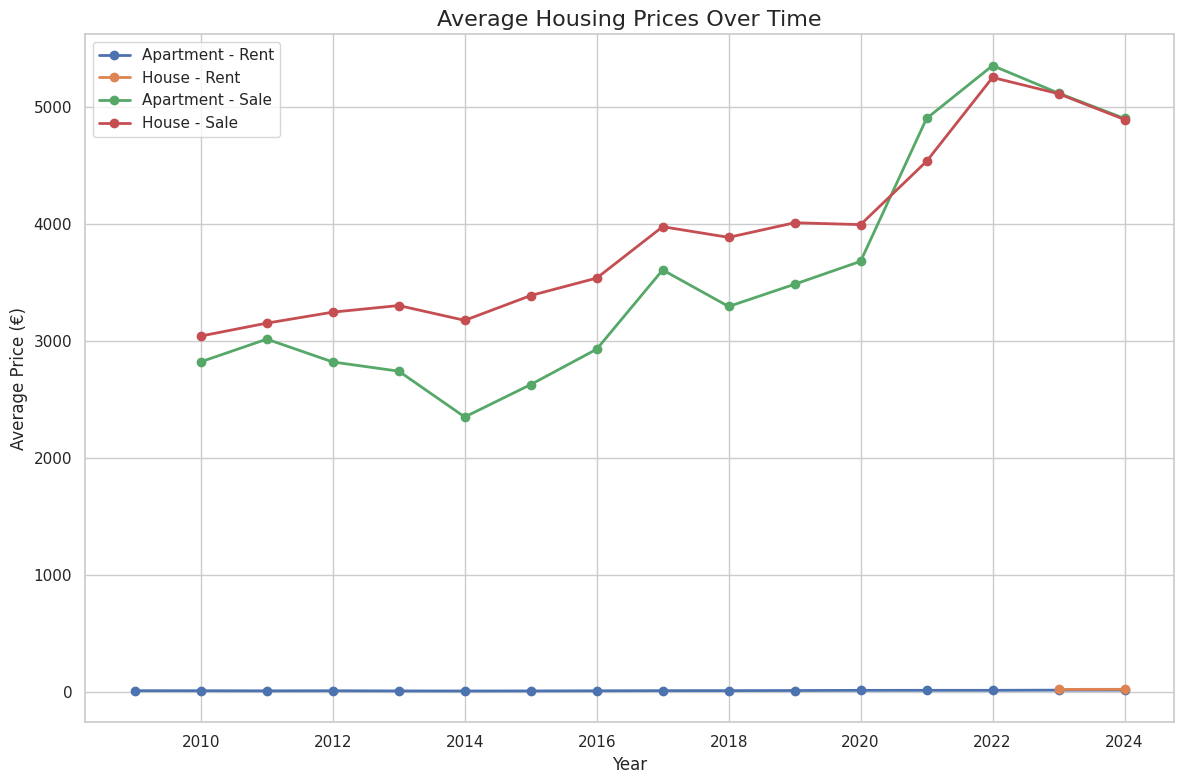

In [20]:
# Plot price trends over time
plt.figure(figsize=(12, 8))

# Filter for each category
for trans_type in price_trends['transaction_type'].unique():
    for prop_type in price_trends['property_type'].unique():
        if prop_type == 'unknown':
            continue
            
        df_filtered = price_trends[
            (price_trends['transaction_type'] == trans_type) & 
            (price_trends['property_type'] == prop_type)
        ]
        
        if not df_filtered.empty:
            plt.plot(
                df_filtered['year'], 
                df_filtered['average_price_sqm'],
                marker='o',
                linewidth=2,
                label=f"{prop_type.capitalize()} - {trans_type.capitalize()}"
            )

plt.title('Average Housing Prices Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

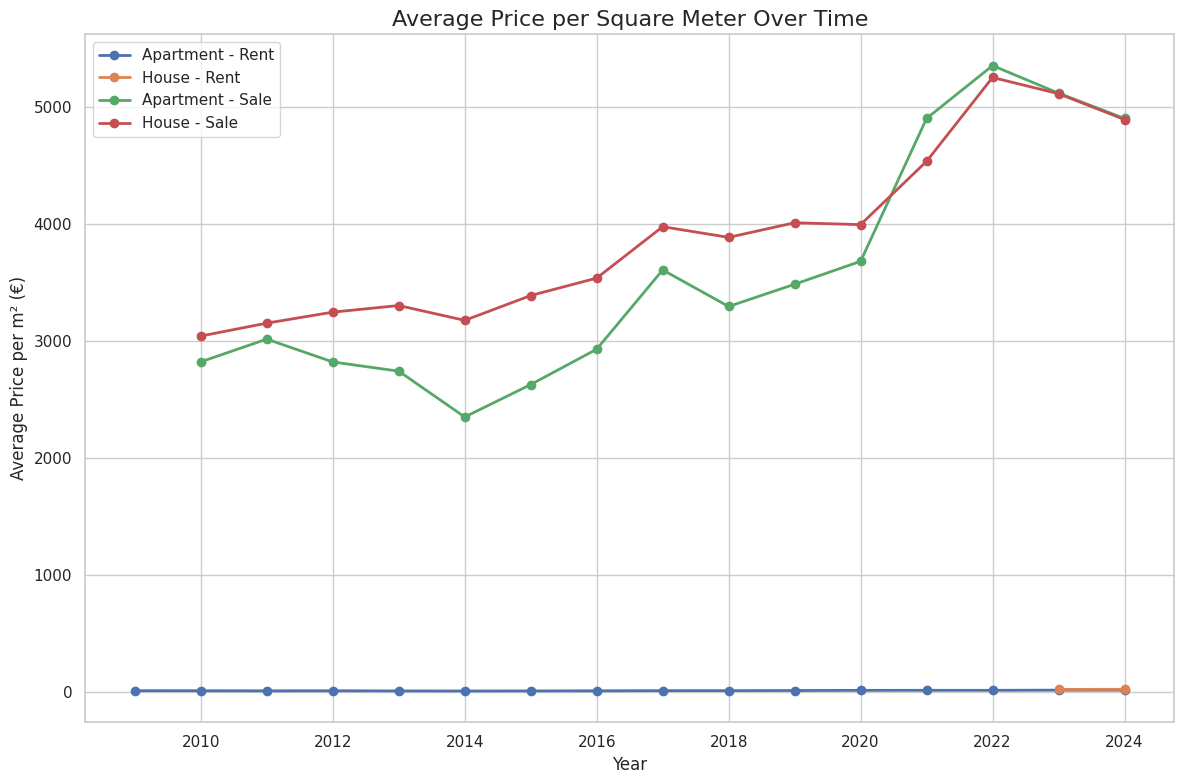

In [21]:
# Plot price per sqm trends over time
plt.figure(figsize=(12, 8))

for trans_type in price_trends['transaction_type'].unique():
    for prop_type in price_trends['property_type'].unique():
        if prop_type == 'unknown':
            continue
            
        df_filtered = price_trends[
            (price_trends['transaction_type'] == trans_type) & 
            (price_trends['property_type'] == prop_type)
        ]
        
        if not df_filtered.empty:
            plt.plot(
                df_filtered['year'], 
                df_filtered['average_price_sqm'],
                marker='o',
                linewidth=2,
                label=f"{prop_type.capitalize()} - {trans_type.capitalize()}"
            )

plt.title('Average Price per Square Meter Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price per m² (€)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Municipality Comparison

Let's compare housing prices across different municipalities for the most recent year.

In [22]:
# Get the most recent year in our dataset
most_recent_year = max(available_years)
print(f"Analyzing data for year: {most_recent_year}")

# Query for municipality comparison
query = f"""
SELECT 
    municipality, 
    transaction_type,
    property_type,
    AVG(avg_price) as average_price,
    AVG(avg_price_sqm) as average_price_sqm,
    SUM(num_listings) as total_listings
FROM housing_data
WHERE year = {most_recent_year}
GROUP BY municipality, transaction_type, property_type
ORDER BY average_price_sqm DESC
"""

municipality_data = pd.read_sql_query(query, conn)
municipality_data.head(10)

Analyzing data for year: 2024


,municipality,transaction_type,property_type,average_price,average_price_sqm,total_listings
0,Luxembourg,sale,apartment,984251.9,12918.740,6185
1,Niederanven,sale,apartment,1297092.0,10765.200,55
2,Strassen,sale,apartment,847703.6,10740.750,323
3,Bertrange,sale,apartment,1031585.0,10558.560,402
4,Mersch,sale,apartment,671814.2,10235.660,808
5,Mamer,sale,apartment,880661.5,10208.570,1888
6,Hesperange,sale,apartment,1007418.0,10116.600,585
7,Kopstal,sale,apartment,934723.2,9584.794,130
8,Contern,sale,apartment,825960.2,9309.313,93
9,Schuttrange,sale,apartment,975999.3,9199.216,51


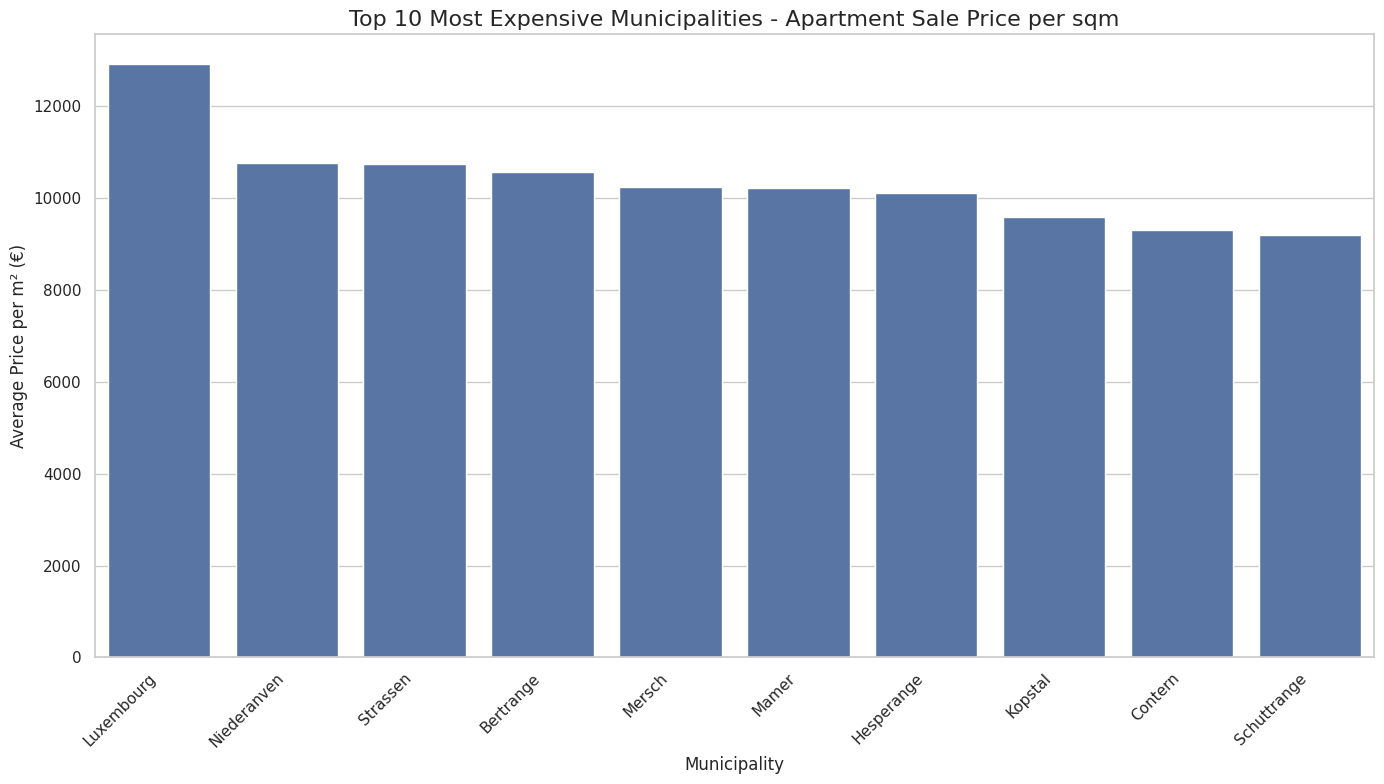

In [23]:
# Plot top 10 most expensive municipalities (by price per sqm)
plt.figure(figsize=(14, 8))

# Filter for apartments for sale
apartments_sale = municipality_data[
    (municipality_data['property_type'] == 'apartment') & 
    (municipality_data['transaction_type'] == 'sale')
]

# Get top 10
top_municipalities = apartments_sale.sort_values('average_price_sqm', ascending=False).head(10)

# Create bar chart
sns.barplot(x='municipality', y='average_price_sqm', data=top_municipalities)
plt.title('Top 10 Most Expensive Municipalities - Apartment Sale Price per sqm', fontsize=16)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Average Price per m² (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

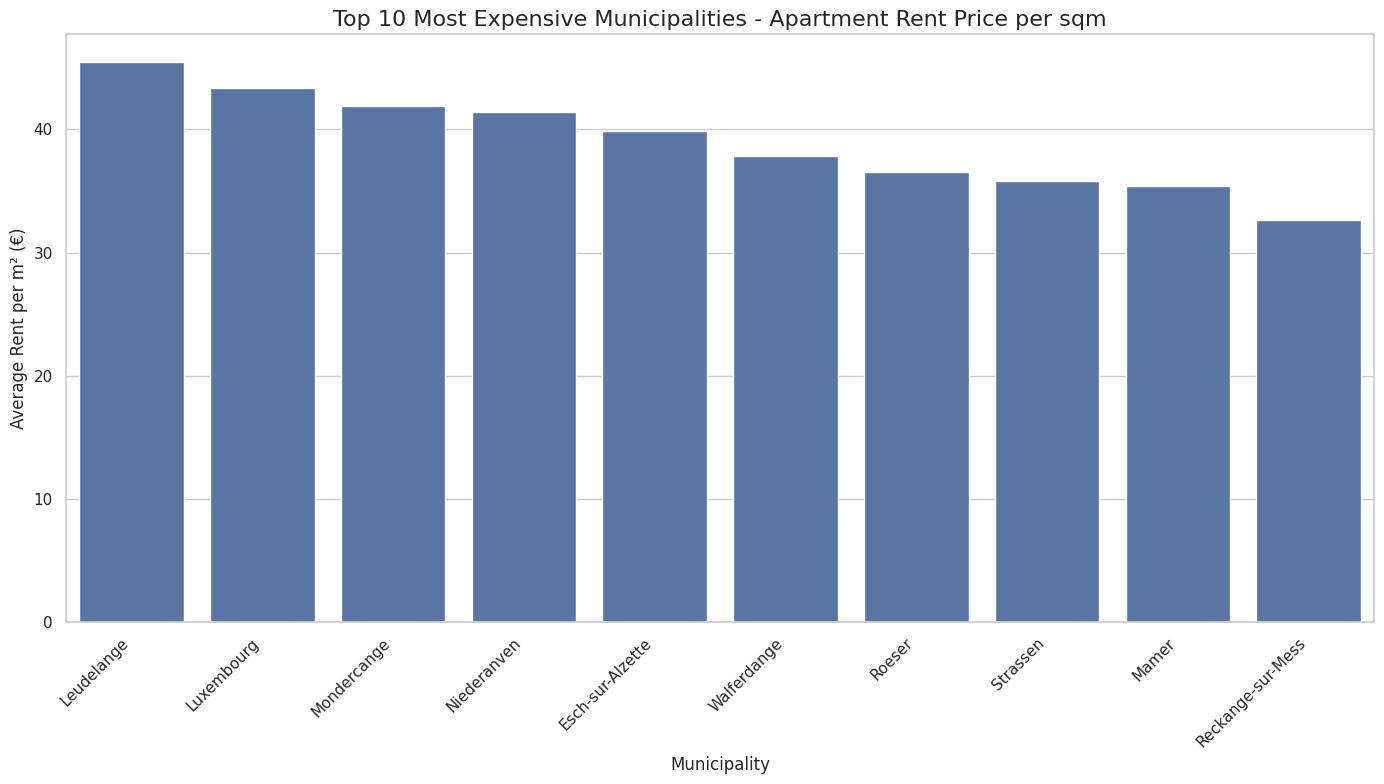

In [24]:
# Plot top 10 most expensive municipalities for rent
plt.figure(figsize=(14, 8))

# Filter for apartments for rent
apartments_rent = municipality_data[
    (municipality_data['property_type'] == 'apartment') & 
    (municipality_data['transaction_type'] == 'rent')
]

# Get top 10
top_municipalities_rent = apartments_rent.sort_values('average_price_sqm', ascending=False).head(10)

# Create bar chart
sns.barplot(x='municipality', y='average_price_sqm', data=top_municipalities_rent)
plt.title('Top 10 Most Expensive Municipalities - Apartment Rent Price per sqm', fontsize=16)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Average Rent per m² (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Market Activity

Let's analyze the number of listings across years to understand market activity.

In [25]:
# Query for market activity
query = """
SELECT 
    year, 
    transaction_type,
    property_type,
    SUM(num_listings) as total_listings
FROM housing_data
WHERE year IS NOT NULL
GROUP BY year, transaction_type, property_type
ORDER BY year, transaction_type, property_type
"""

market_activity = pd.read_sql_query(query, conn)
market_activity.head()

,year,transaction_type,property_type,total_listings
0,2009,rent,apartment,16682
1,2010,rent,apartment,18070
2,2010,sale,apartment,36306
3,2010,sale,house,19278
4,2011,rent,apartment,15045


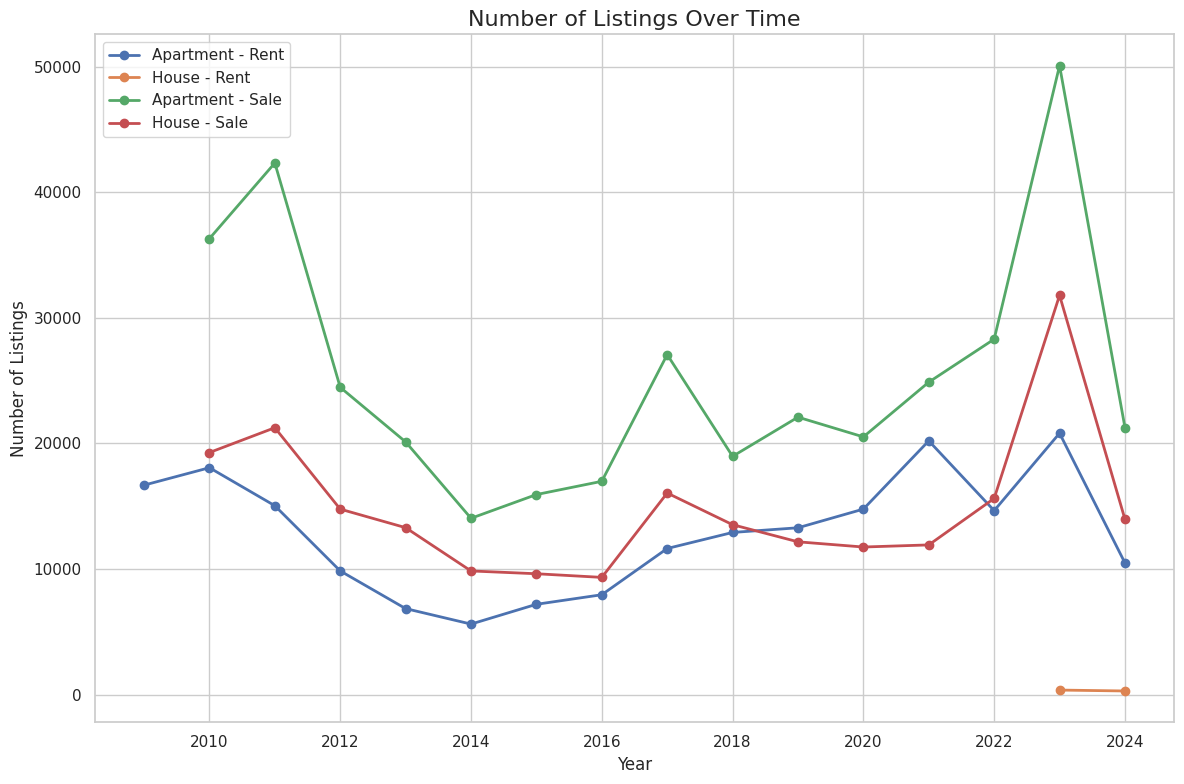

In [26]:
# Plot market activity over time
plt.figure(figsize=(12, 8))

for trans_type in market_activity['transaction_type'].unique():
    for prop_type in market_activity['property_type'].unique():
        if prop_type == 'unknown':
            continue
            
        df_filtered = market_activity[
            (market_activity['transaction_type'] == trans_type) & 
            (market_activity['property_type'] == prop_type)
        ]
        
        if not df_filtered.empty:
            plt.plot(
                df_filtered['year'], 
                df_filtered['total_listings'],
                marker='o',
                linewidth=2,
                label=f"{prop_type.capitalize()} - {trans_type.capitalize()}"
            )

plt.title('Number of Listings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Price-to-Rent Ratio

Let's calculate the price-to-rent ratio for different municipalities, which is an indicator of whether it's better to buy or rent.

In [47]:
# Query for latest year data to calculate price-to-rent ratio
query = f"""
SELECT 
    municipality, 
    property_type,
    transaction_type,
    AVG(avg_price) as average_price,
    AVG(avg_price_sqm) as average_price_sqm
FROM housing_data
WHERE year = {most_recent_year}
GROUP BY municipality, property_type, transaction_type
"""

latest_prices = pd.read_sql_query(query, conn)

# Create dictionaries for sale and rent prices
sale_prices = {}
rent_prices = {}

# Only consider apartments for simplicity
latest_prices = latest_prices[latest_prices['property_type'] == 'apartment']

# Fill the dictionaries
for _, row in latest_prices.iterrows():
    municipality = row['municipality']
    if row['transaction_type'] == 'sale':
        sale_prices[municipality] = row['average_price']
    elif row['transaction_type'] == 'rent':
        # Multiply monthly rent by 12 to get annual rent
        rent_prices[municipality] = row['average_price'] * 12

# Calculate price-to-rent ratio
price_to_rent = []
for municipality in set(sale_prices.keys()).intersection(set(rent_prices.keys())):
    if sale_prices[municipality] > 0 and rent_prices[municipality] > 0:
        ratio = sale_prices[municipality] / rent_prices[municipality]
        price_to_rent.append({
            'municipality': municipality,
            'price_to_rent_ratio': ratio,
            'sale_price': sale_prices[municipality],
            'annual_rent': rent_prices[municipality]
        })

# Convert to DataFrame
price_to_rent_df = pd.DataFrame(price_to_rent)
price_to_rent_df = price_to_rent_df.sort_values('price_to_rent_ratio', ascending=False)

# Display price-to-rent ratios
price_to_rent_df.head(10)

,municipality,price_to_rent_ratio,sale_price,annual_rent
17,Niederanven,71.218015,1297092.0,18212.976
31,Reckange-sur-Mess,69.100880,774375.7,11206.452
29,Grevenmacher,57.326854,1113861.0,19430.004
18,Leudelange,53.750822,720872.7,13411.380
26,Frisange,53.451725,928813.1,17376.672
35,Remich,53.309439,903646.8,16950.972
25,Käerjeng,52.054296,735666.5,14132.676
0,Mamer,47.192995,880661.5,18660.852
16,Habscht,44.642313,795168.7,17811.996
8,Bertrange,44.404060,1031585.0,23231.772


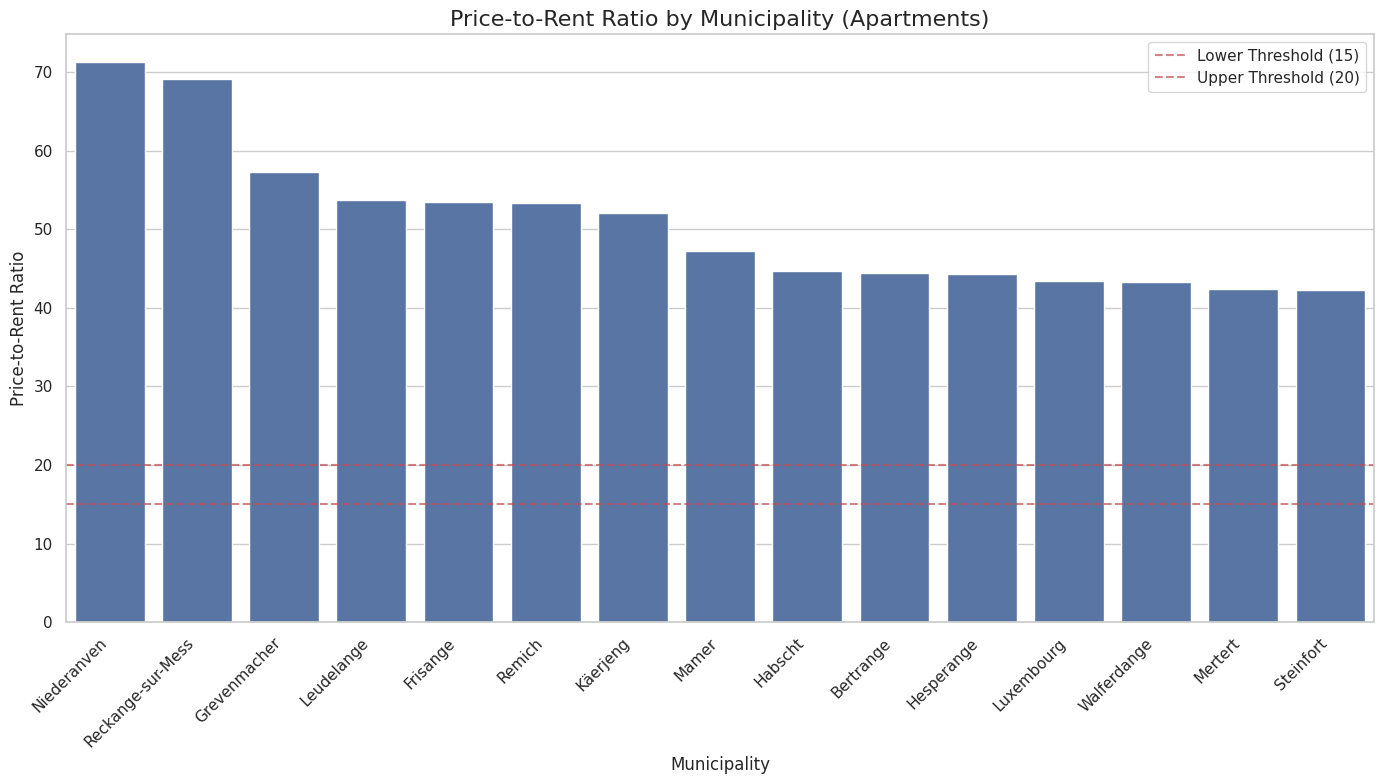

In [29]:
# Plot price-to-rent ratio for top 15 municipalities
plt.figure(figsize=(14, 8))

# Get top 15
top_15_ptr = price_to_rent_df.head(15)

# Create bar chart
sns.barplot(x='municipality', y='price_to_rent_ratio', data=top_15_ptr)
plt.title('Price-to-Rent Ratio by Municipality (Apartments)', fontsize=16)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Price-to-Rent Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Add a horizontal line for the "15-20" range threshold
plt.axhline(y=15, color='r', linestyle='--', alpha=0.7, label='Lower Threshold (15)')
plt.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='Upper Threshold (20)')
plt.legend()

plt.show()

## Closing the Connection

Remember to close the database connection when finished.

In [ ]:
# Close the connection
conn.close()
print("Database connection closed.")

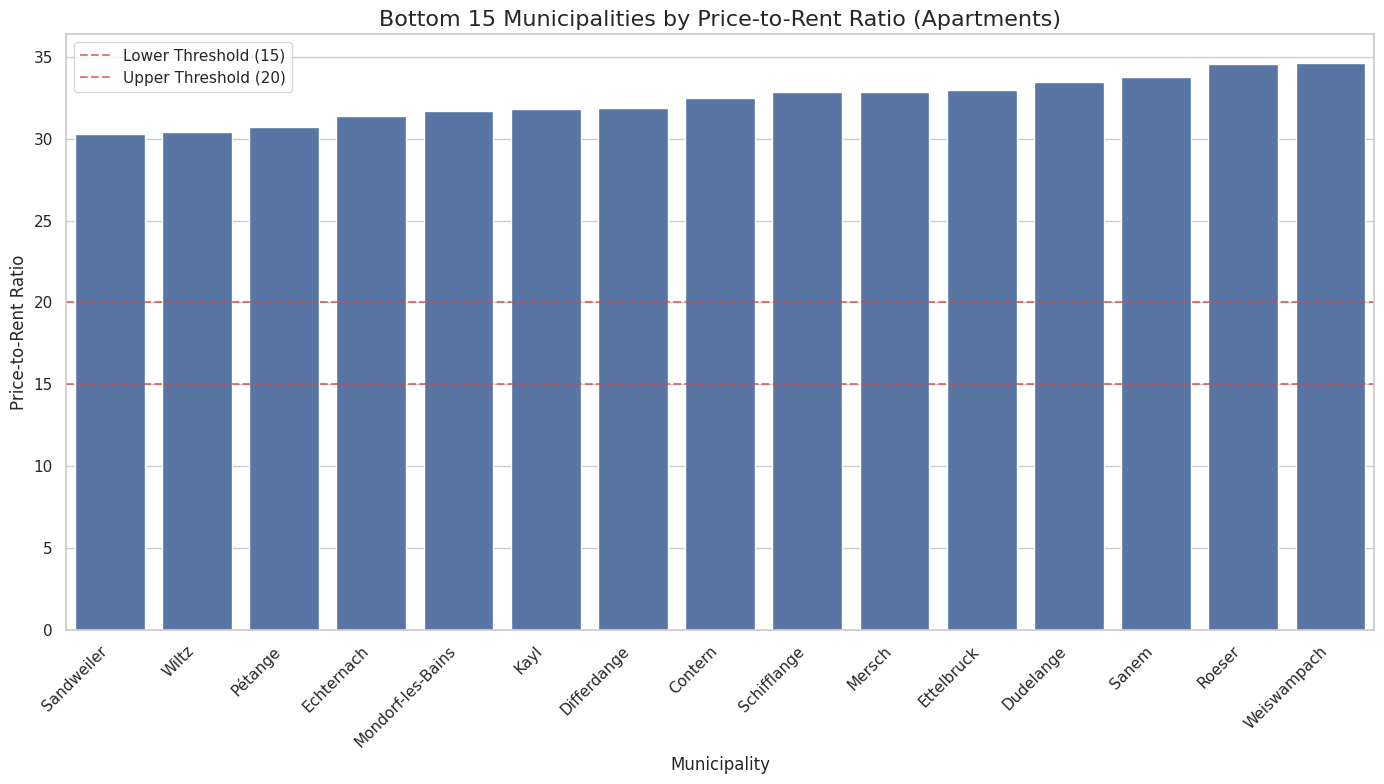

In [46]:
# Plot price-to-rent ratio for bottom 15 municipalities
plt.figure(figsize=(14, 8))

# Get bottom 15 municipalities (lowest price-to-rent ratio)
bottom_15_ptr = price_to_rent_df.tail(15).sort_values('price_to_rent_ratio')

# Create bar chart
sns.barplot(x='municipality', y='price_to_rent_ratio', data=bottom_15_ptr)
plt.title('Bottom 15 Municipalities by Price-to-Rent Ratio (Apartments)', fontsize=16)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Price-to-Rent Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Add horizontal lines for the investment threshold
plt.axhline(y=15, color='r', linestyle='--', alpha=0.7, label='Lower Threshold (15)')
plt.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='Upper Threshold (20)')
plt.legend()

plt.show()

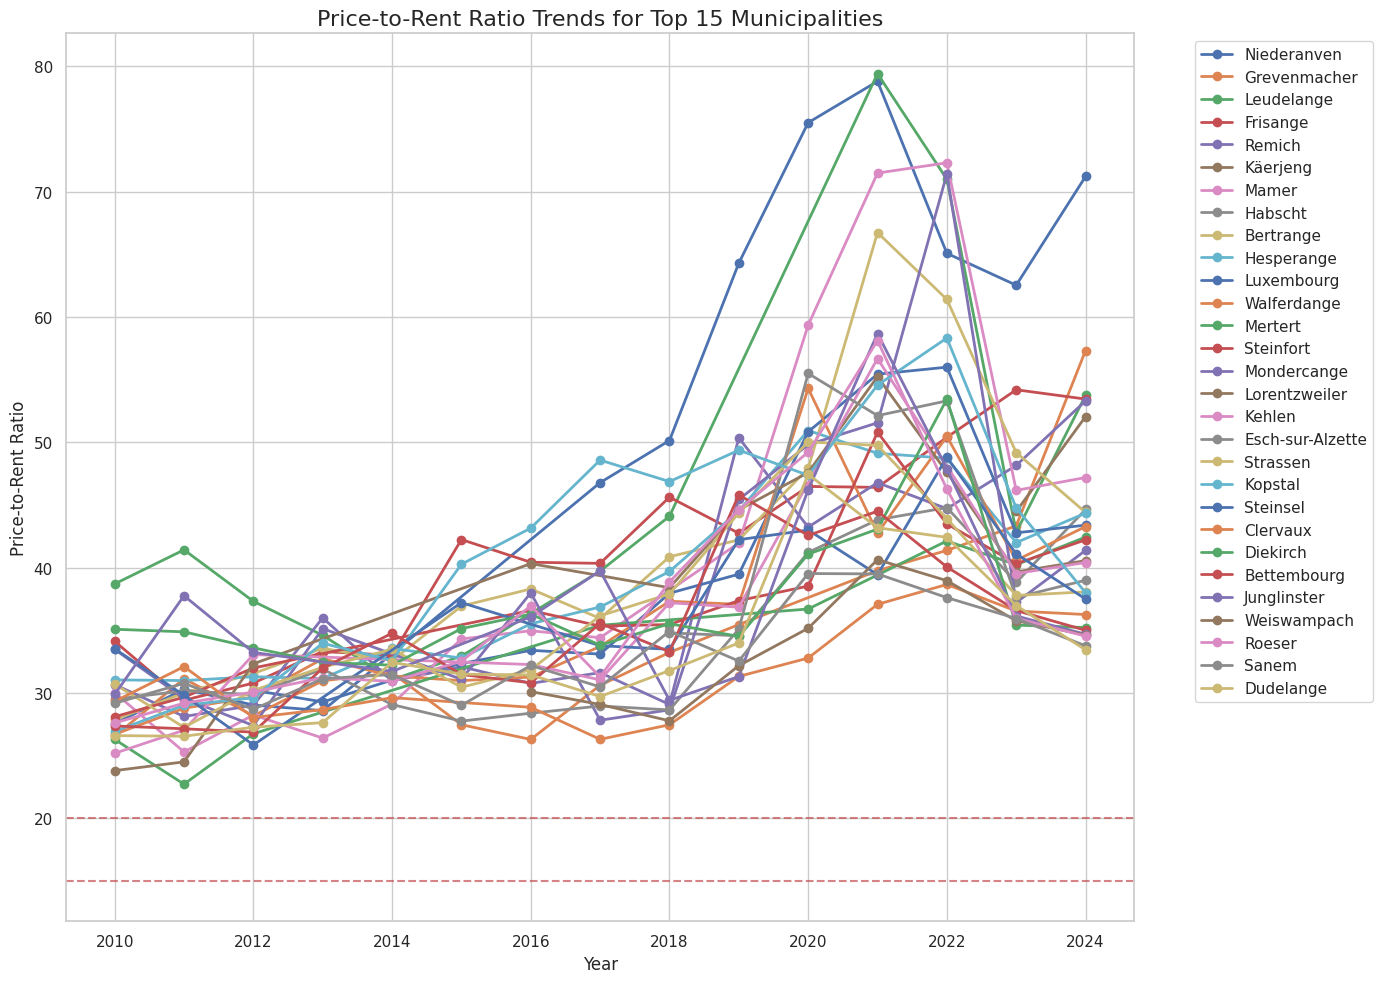

In [45]:
# Query for price-to-rent ratio trends over time
query = """
SELECT 
    year,
    municipality, 
    property_type,
    transaction_type,
    AVG(avg_price) as average_price
FROM housing_data
WHERE property_type = 'apartment' AND year IS NOT NULL
GROUP BY year, municipality, property_type, transaction_type
"""

historical_prices = pd.read_sql_query(query, conn)

# Get the top 15 municipalities from the current price-to-rent analysis
top_15_municipalities = price_to_rent_df.head(30)['municipality'].tolist()

# Calculate historical price-to-rent ratios for these municipalities
ptr_trends = []

# Process each year
for year in sorted(historical_prices['year'].unique()):
    year_data = historical_prices[historical_prices['year'] == year]
    
    # Create dictionaries for this year's sale and rent prices
    year_sale_prices = {}
    year_rent_prices = {}
    
    # Fill the dictionaries
    for _, row in year_data.iterrows():
        municipality = row['municipality']
        if municipality not in top_15_municipalities:
            continue
            
        if row['transaction_type'] == 'sale':
            year_sale_prices[municipality] = row['average_price']
        elif row['transaction_type'] == 'rent':
            # Multiply by 12 to get annual rent
            year_rent_prices[municipality] = row['average_price'] * 12
    
    # Calculate price-to-rent ratio for this year
    for municipality in set(year_sale_prices.keys()).intersection(set(year_rent_prices.keys())):
        if year_sale_prices[municipality] > 0 and year_rent_prices[municipality] > 0:
            ratio = year_sale_prices[municipality] / year_rent_prices[municipality]
            ptr_trends.append({
                'year': year,
                'municipality': municipality,
                'price_to_rent_ratio': ratio
            })

# Convert to DataFrame
ptr_trends_df = pd.DataFrame(ptr_trends)

# Plot trends for top 15 municipalities
plt.figure(figsize=(14, 10))

# Get unique municipalities in our trends data that are also in top 15
trend_municipalities = [m for m in top_15_municipalities if m in ptr_trends_df['municipality'].unique()]

# Plot each municipality
for municipality in trend_municipalities:
    municipality_data = ptr_trends_df[ptr_trends_df['municipality'] == municipality]
    if len(municipality_data) > 1:  # Only plot if we have multiple years of data
        plt.plot(
            municipality_data['year'],
            municipality_data['price_to_rent_ratio'],
            marker='o',
            linewidth=2,
            label=municipality
        )

plt.title('Price-to-Rent Ratio Trends for Top 15 Municipalities', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price-to-Rent Ratio', fontsize=12)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add horizontal lines for the investment threshold
plt.axhline(y=15, color='r', linestyle='--', alpha=0.7, label='Lower Threshold (15)')
plt.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='Upper Threshold (20)')

plt.show()

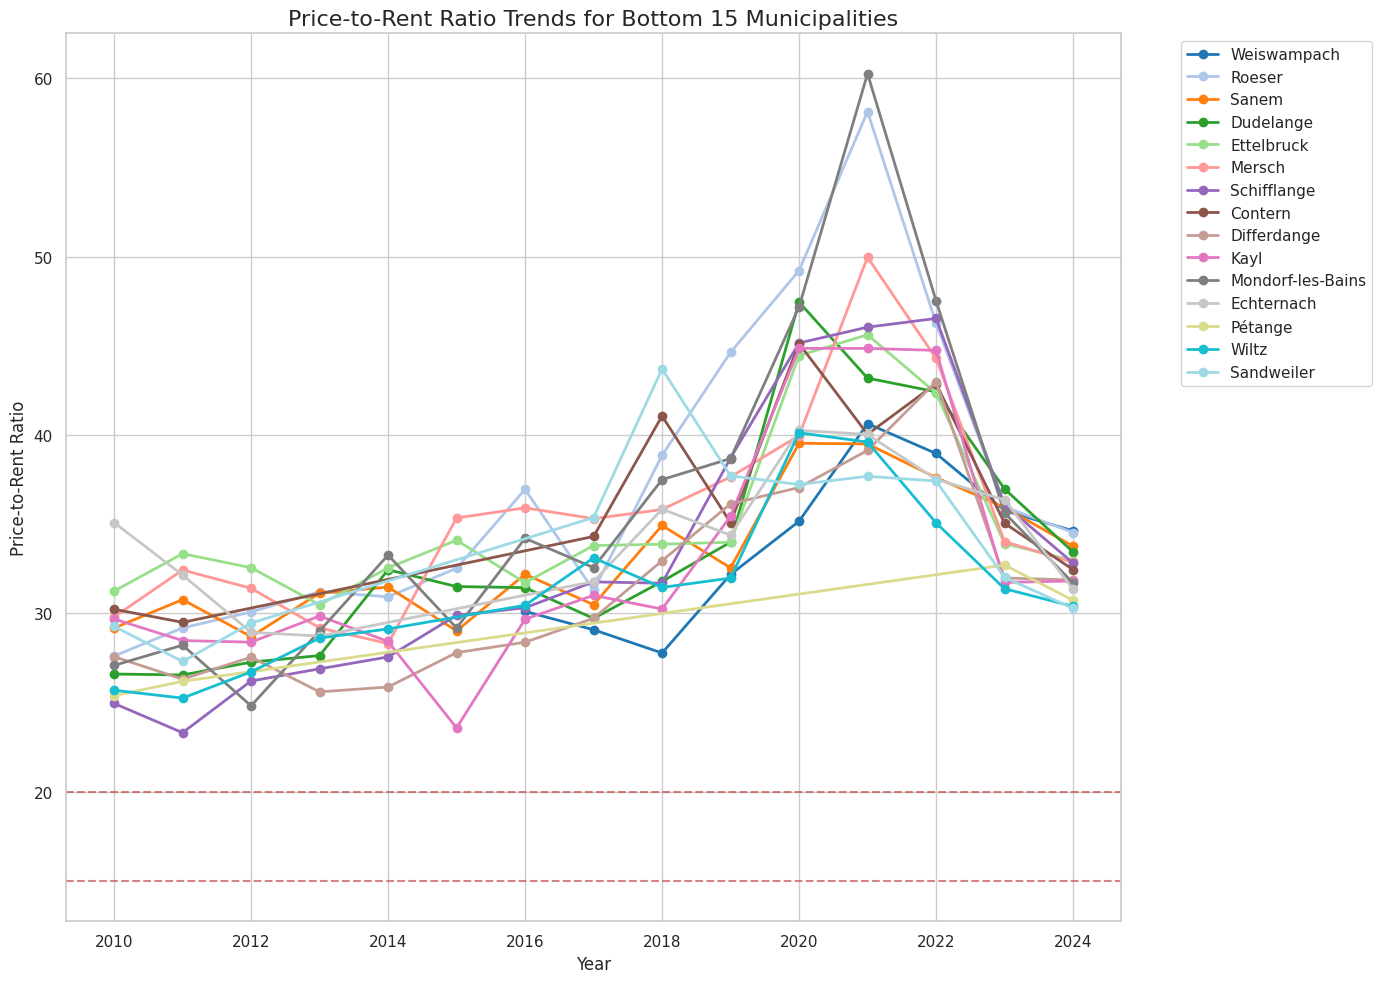


Bottom 15 Price-to-Rent Ratios for Year 2024:
Sandweiler: 30.27
Wiltz: 30.39
Pétange: 30.73
Echternach: 31.35
Mondorf-les-Bains: 31.70
Kayl: 31.81
Differdange: 31.87
Contern: 32.44
Schifflange: 32.82
Mersch: 32.86
Ettelbruck: 32.95
Dudelange: 33.44
Sanem: 33.76
Roeser: 34.53
Weiswampach: 34.62


In [39]:
# Get the bottom 15 municipalities from the current price-to-rent analysis
bottom_15_municipalities = price_to_rent_df.tail(15)['municipality'].tolist()

# Use the historical price data we already queried above

# Calculate historical price-to-rent ratios for bottom 15 municipalities
ptr_bottom_trends = []

# Process each year
for year in sorted(historical_prices['year'].unique()):
    year_data = historical_prices[historical_prices['year'] == year]
    
    # Create dictionaries for this year's sale and rent prices
    year_sale_prices = {}
    year_rent_prices = {}
    
    # Fill the dictionaries
    for _, row in year_data.iterrows():
        municipality = row['municipality']
        if municipality not in bottom_15_municipalities:
            continue
            
        if row['transaction_type'] == 'sale':
            year_sale_prices[municipality] = row['average_price']
        elif row['transaction_type'] == 'rent':
            # Multiply by 12 to get annual rent
            year_rent_prices[municipality] = row['average_price'] * 12
    
    # Calculate price-to-rent ratio for this year
    for municipality in set(year_sale_prices.keys()).intersection(set(year_rent_prices.keys())):
        if year_sale_prices[municipality] > 0 and year_rent_prices[municipality] > 0:
            ratio = year_sale_prices[municipality] / year_rent_prices[municipality]
            ptr_bottom_trends.append({
                'year': year,
                'municipality': municipality,
                'price_to_rent_ratio': ratio
            })

# Convert to DataFrame
ptr_bottom_trends_df = pd.DataFrame(ptr_bottom_trends)

# Plot trends for bottom 15 municipalities
plt.figure(figsize=(14, 10))

# Get unique municipalities in our trends data that are also in bottom 15
trend_bottom_municipalities = [m for m in bottom_15_municipalities if m in ptr_bottom_trends_df['municipality'].unique()]

# Set a colormap for clear differentiation
colors = plt.cm.tab20(np.linspace(0, 1, len(trend_bottom_municipalities)))

# Plot each municipality
for i, municipality in enumerate(trend_bottom_municipalities):
    municipality_data = ptr_bottom_trends_df[ptr_bottom_trends_df['municipality'] == municipality]
    if len(municipality_data) > 1:  # Only plot if we have multiple years of data
        plt.plot(
            municipality_data['year'],
            municipality_data['price_to_rent_ratio'],
            marker='o',
            linewidth=2,
            label=municipality,
            color=colors[i]
        )

plt.title('Price-to-Rent Ratio Trends for Bottom 15 Municipalities', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price-to-Rent Ratio', fontsize=12)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add horizontal lines for the investment threshold
plt.axhline(y=15, color='r', linestyle='--', alpha=0.7, label='Lower Threshold (15)')
plt.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='Upper Threshold (20)')

plt.show()

# Add a summary table for the latest year
latest_year = max(ptr_bottom_trends_df['year'])
latest_data = ptr_bottom_trends_df[ptr_bottom_trends_df['year'] == latest_year].sort_values('price_to_rent_ratio')

print(f"\nBottom 15 Price-to-Rent Ratios for Year {latest_year}:")
for _, row in latest_data.iterrows():
    print(f"{row['municipality']}: {row['price_to_rent_ratio']:.2f}")

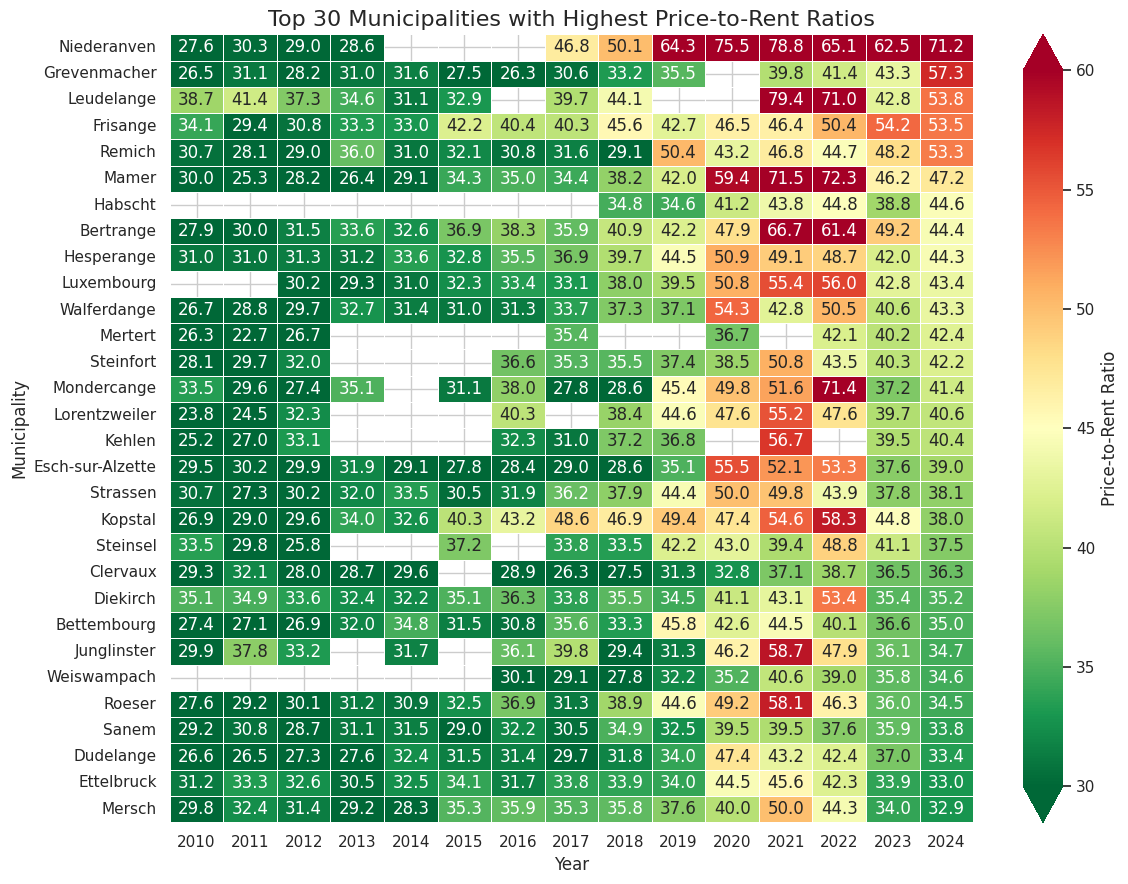

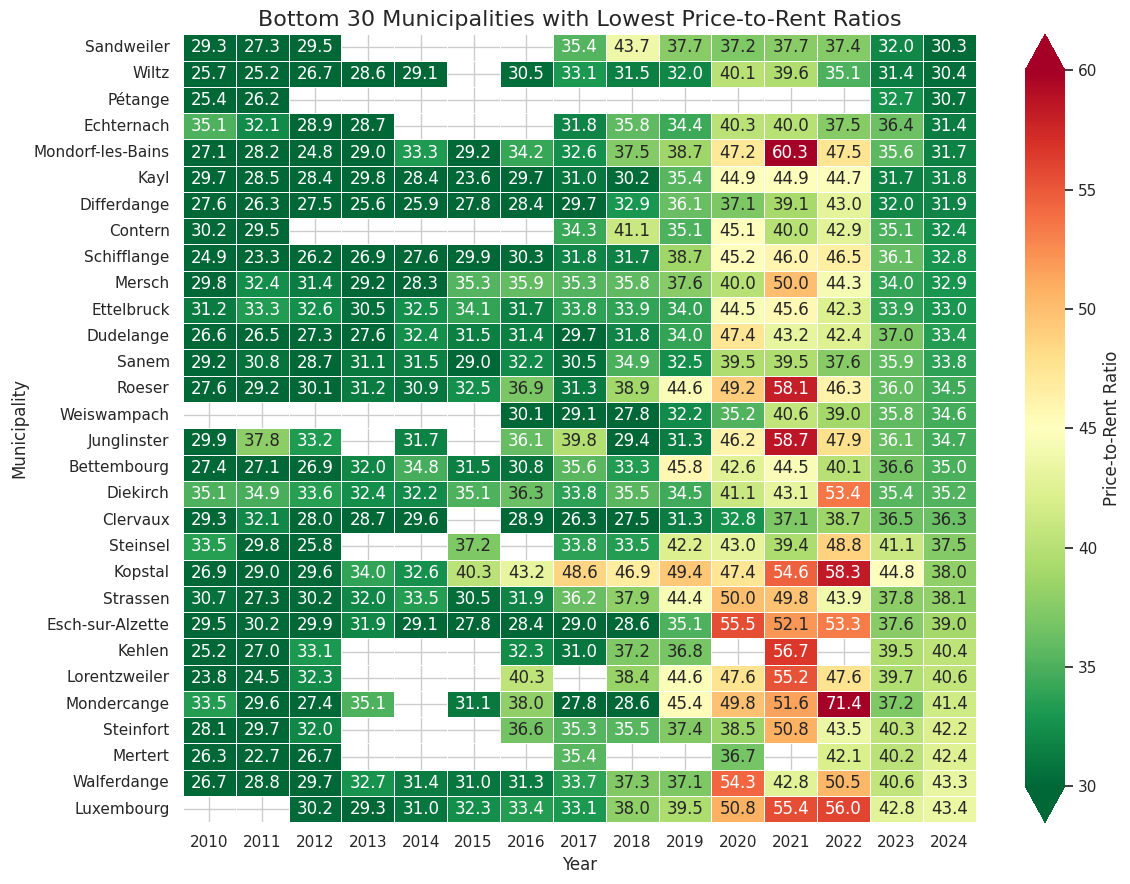


Municipalities with Largest Annual Increase in Price-to-Rent Ratio:


,municipality,initial_ptr,final_ptr,total_change,avg_annual_change
0,Niederanven,27.551614,71.218015,43.666401,3.119029
1,Grevenmacher,26.535300,57.326854,30.791553,2.199397
4,Remich,30.666824,53.309439,22.642615,1.617330
3,Frisange,34.121382,53.451725,19.330343,1.380739
5,Mamer,30.023655,47.192995,17.169340,1.226381



Municipalities with Largest Annual Decrease in Price-to-Rent Ratio:


,municipality,initial_ptr,final_ptr,total_change,avg_annual_change
35,Echternach,35.086967,31.351337,-3.735630,-0.266831
21,Diekirch,35.083594,35.220767,0.137173,0.009798
6,Habscht,NaN,44.642313,NaN,NaN
9,Luxembourg,NaN,43.389797,NaN,NaN
24,Weiswampach,NaN,34.624789,NaN,NaN


In [40]:
if len(ptr_trends) > 0:  # Only if we have enough data
    # Combine top and bottom trends
    all_ptr_trends = pd.concat([pd.DataFrame(ptr_trends), pd.DataFrame(ptr_bottom_trends)])
    
    # Pivot the data
    ptr_pivot = all_ptr_trends.pivot_table(
        index='municipality', 
        columns='year',
        values='price_to_rent_ratio',
        aggfunc='mean'
    )
    
    # Sort municipalities by their most recent price-to-rent ratio
    latest_year_col = ptr_pivot.columns.max()
    if not pd.isna(latest_year_col):
        ptr_pivot = ptr_pivot.sort_values(by=latest_year_col, ascending=False)
    
    # Only keep municipalities with at least 3 years of data
    ptr_pivot = ptr_pivot.loc[ptr_pivot.count(axis=1) >= 3]
    
    # Plot heatmap if we have enough data
    if not ptr_pivot.empty and ptr_pivot.shape[0] > 5:
        # Get top 30 and bottom 30 municipalities
        top_30 = ptr_pivot.head(30)
        bottom_30 = ptr_pivot.tail(30)
        
        # Plot top 30 municipalities
        plt.figure(figsize=(12, max(8, len(top_30) * 0.3)))
        cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
        
        sns.heatmap(top_30, cmap=cmap, annot=True, fmt=".1f", 
                    linewidths=.5, 
                    vmin=30, vmax=60,
                    cbar_kws={'label': 'Price-to-Rent Ratio',
                             'extend': 'both'})
        
        plt.title('Top 30 Municipalities with Highest Price-to-Rent Ratios', fontsize=16)
        plt.ylabel('Municipality', fontsize=12)
        plt.xlabel('Year', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Plot bottom 30 municipalities
        plt.figure(figsize=(12, max(8, len(bottom_30) * 0.3)))
        
        # For bottom municipalities, we'll reverse the order to show the lowest at the top
        sns.heatmap(bottom_30.iloc[::-1], cmap=cmap, annot=True, fmt=".1f", 
                    linewidths=.5, 
                    vmin=30, vmax=60,
                    cbar_kws={'label': 'Price-to-Rent Ratio',
                             'extend': 'both'})
        
        plt.title('Bottom 30 Municipalities with Lowest Price-to-Rent Ratios', fontsize=16)
        plt.ylabel('Municipality', fontsize=12)
        plt.xlabel('Year', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Calculate and show the average annual change in price-to-rent ratio
        if len(ptr_pivot.columns) > 1:
            first_year = ptr_pivot.columns.min()
            last_year = ptr_pivot.columns.max()
            years_diff = last_year - first_year
            
            if years_diff > 0:
                # Compute the average annual change
                ptr_change = (ptr_pivot[last_year] - ptr_pivot[first_year]) / years_diff
                
                # Create a DataFrame for display
                ptr_change_df = pd.DataFrame({
                    'municipality': ptr_change.index,
                    'initial_ptr': ptr_pivot[first_year],
                    'final_ptr': ptr_pivot[last_year],
                    'total_change': ptr_pivot[last_year] - ptr_pivot[first_year],
                    'avg_annual_change': ptr_change
                }).reset_index(drop=True)
                
                # Sort by average annual change
                ptr_change_df = ptr_change_df.sort_values('avg_annual_change', ascending=False)
                
                print("\nMunicipalities with Largest Annual Increase in Price-to-Rent Ratio:")
                display(ptr_change_df.head(5))
                
                print("\nMunicipalities with Largest Annual Decrease in Price-to-Rent Ratio:")
                display(ptr_change_df.tail(5).sort_values('avg_annual_change'))
    else:
        print("Not enough data to create a meaningful heatmap of Price-to-Rent ratio evolution.")
else:
    print("Insufficient historical data to create price-to-rent ratio trends.")


In [44]:
sales_data

,year,municipality,property_type,transaction_type,average_price
117,2010,Bascharage,apartment,sale,352221.24
119,2010,Beaufort,apartment,sale,325835.74
121,2010,Bech,apartment,sale,0.00
123,2010,Beckerich,apartment,sale,311309.58
125,2010,Berdorf,apartment,sale,294198.69
...,...,...,...,...,...
3257,2024,Weiswampach,apartment,sale,563147.40
3259,2024,Wiltz,apartment,sale,557654.60
3261,2024,Wincrange,apartment,sale,0.00
3263,2024,Winseler,apartment,sale,707961.20


In [ ]:
df

2025-04-02 15:32:26.695 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 15:32:26.698 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 15:32:27.039 
  command:

    streamlit run /home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-02 15:32:27.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 15:32:27.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 15:32:27.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 15:32:27.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored 

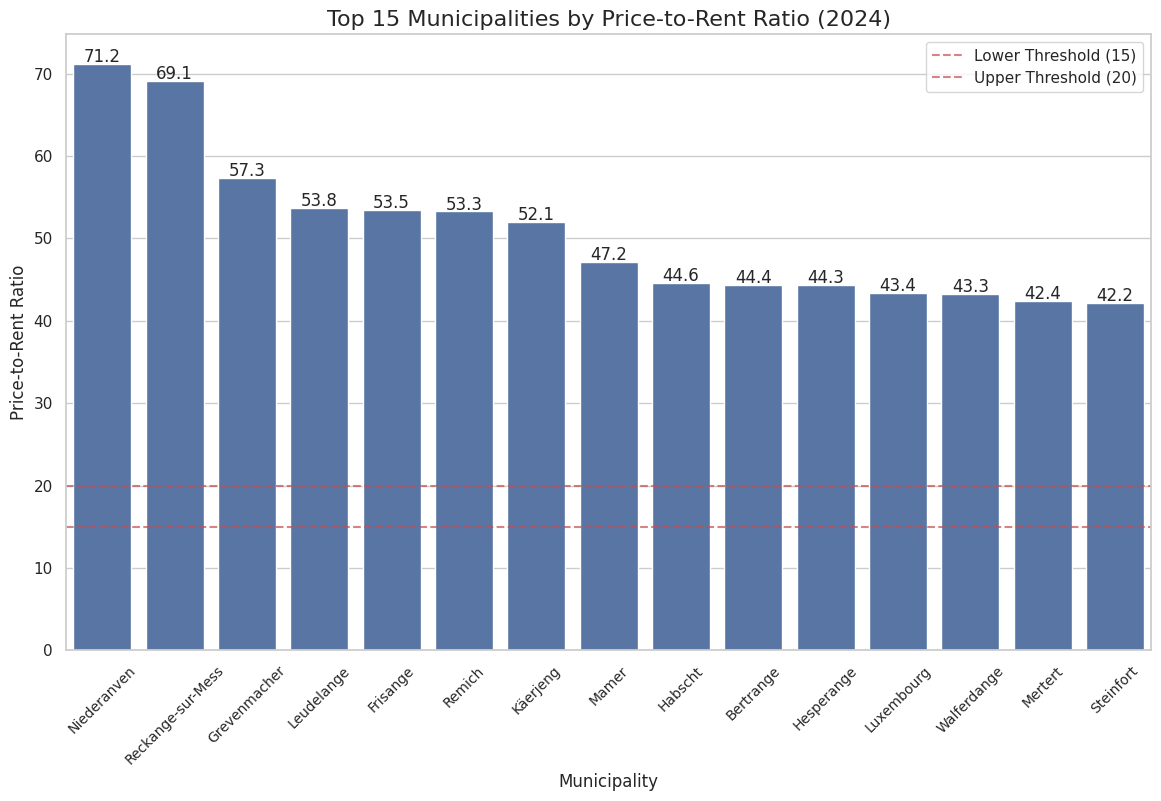

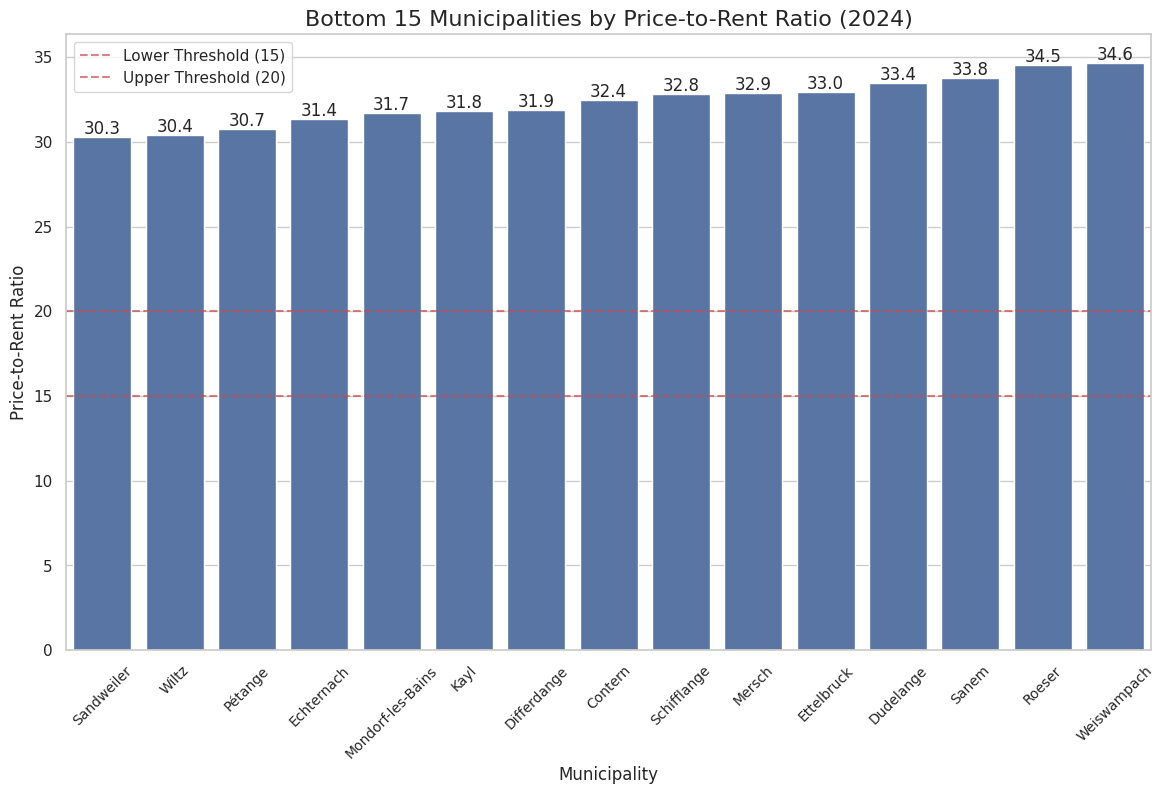

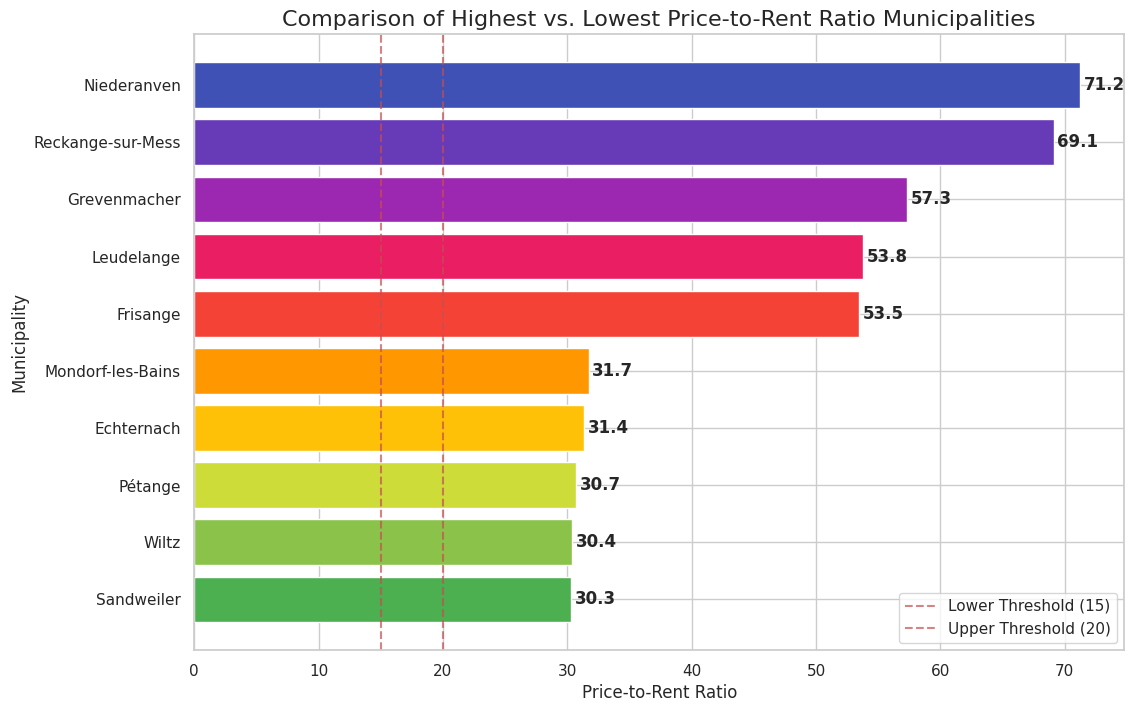

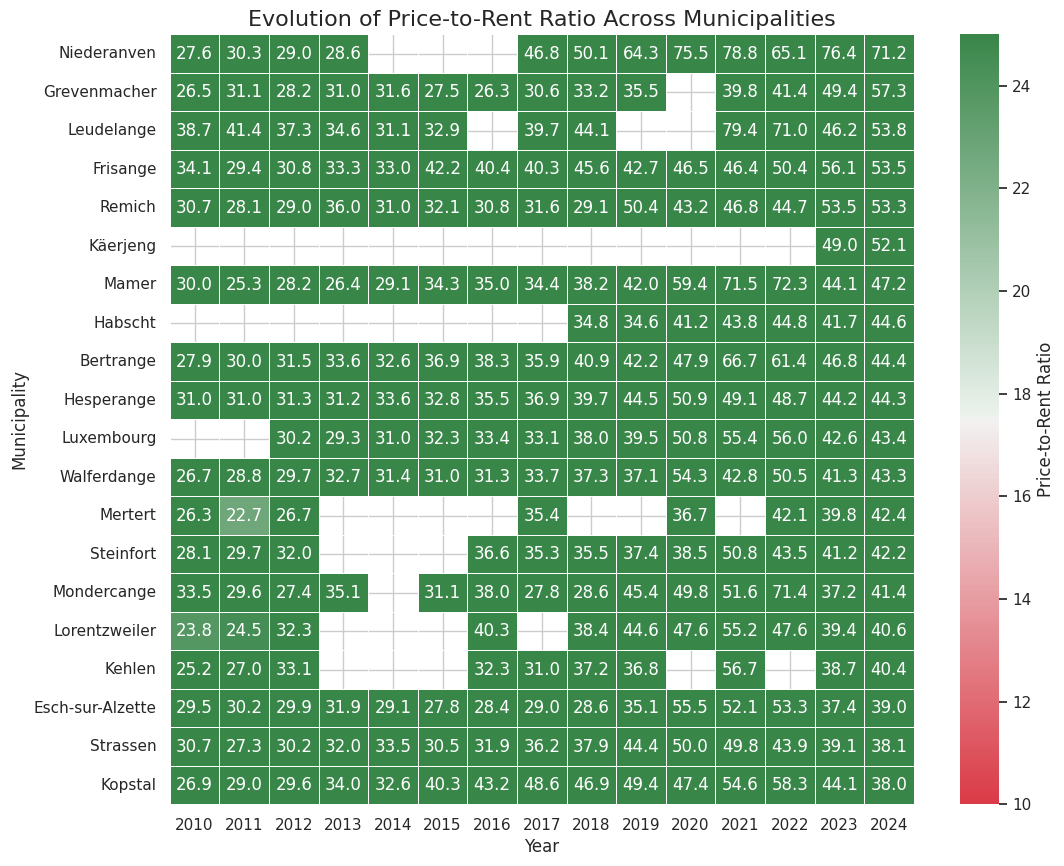

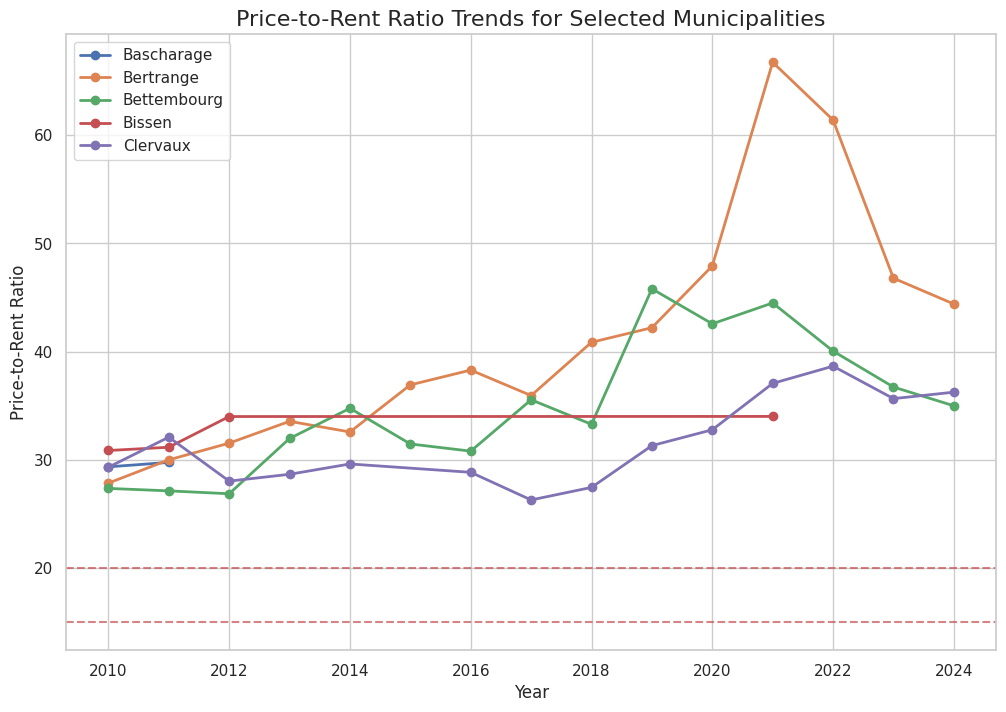

In [ ]:
# After creating the ptr_pivot table as above

# If there are too many municipalities, select top and bottom ones
if len(ptr_pivot) > 60:
    # Get top 30 and bottom 30 municipalities by latest year price-to-rent ratio
    top_30 = ptr_pivot.head(30)
    bottom_30 = ptr_pivot.tail(30)
    
    # Plot top 30 municipalities
    plt.figure(figsize=(12, max(8, len(top_30) * 0.3)))
    cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
    
    sns.heatmap(
        top_30, 
        cmap=cmap, 
        annot=True, 
        fmt=".1f",
        linewidths=.5,
        vmin=30, vmax=60,
        cbar_kws={'label': 'Price-to-Rent Ratio',
                 'extend': 'both'}
    )
    
    plt.title('Top 30 Municipalities with Highest Price-to-Rent Ratios', fontsize=16)
    plt.ylabel('Municipality', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Plot bottom 30 municipalities
    plt.figure(figsize=(12, max(8, len(bottom_30) * 0.3)))
    
    # For bottom municipalities, we'll reverse the order to show the lowest at the top
    sns.heatmap(
        bottom_30.iloc[::-1], 
        cmap=cmap, 
        annot=True, 
        fmt=".1f",
        linewidths=.5,
        vmin=30, vmax=60,
        cbar_kws={'label': 'Price-to-Rent Ratio',
                 'extend': 'both'}
    )
    
    plt.title('Bottom 30 Municipalities with Lowest Price-to-Rent Ratios', fontsize=16)
    plt.ylabel('Municipality', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    # If there aren't too many municipalities, plot them all as in the previous code
    # ...


In [51]:
# Query to get data for all years to calculate price-to-rent ratio over time
query = """
SELECT 
    year,
    municipality, 
    property_type,
    transaction_type,
    AVG(avg_price) as average_price
FROM housing_data
WHERE property_type = 'apartment' AND year IS NOT NULL
GROUP BY year, municipality, property_type, transaction_type
"""

historical_prices = pd.read_sql_query(query, conn)

# Process the data to calculate price-to-rent ratio for each municipality and year
ptr_data = []

# Get unique years in the dataset
years = sorted(historical_prices['year'].unique())

for year in years:
    # Filter data for the current year
    year_data = historical_prices[historical_prices['year'] == year]
    
    # Create dictionaries for sale and rent prices for this year
    sale_prices = {}
    rent_prices = {}
    
    # Fill the dictionaries
    for _, row in year_data.iterrows():
        municipality = row['municipality']
        if row['transaction_type'] == 'sale':
            sale_prices[municipality] = row['average_price']
        elif row['transaction_type'] == 'rent':
            # Multiply monthly rent by 12 to get annual rent
            rent_prices[municipality] = row['average_price'] * 12
    
    # Calculate price-to-rent ratio for this year
    for municipality in set(sale_prices.keys()).intersection(set(rent_prices.keys())):
        if sale_prices[municipality] > 0 and rent_prices[municipality] > 0:
            ratio = sale_prices[municipality] / rent_prices[municipality]
            ptr_data.append({
                'year': year,
                'municipality': municipality,
                'price_to_rent_ratio': ratio,
                'sale_price': sale_prices[municipality],
                'annual_rent': rent_prices[municipality]
            })

# Convert to DataFrame
ptr_df = pd.DataFrame(ptr_data)

# Create a pivot table with municipalities as rows and years as columns
ptr_pivot = ptr_df.pivot_table(
    index='municipality',
    columns='year',
    values='price_to_rent_ratio',
    aggfunc='mean'
)

# Sort municipalities by their most recent price-to-rent ratio
latest_year = ptr_pivot.columns.max()
if not pd.isna(latest_year):
    ptr_pivot = ptr_pivot.sort_values(by=latest_year, ascending=False)

# Only keep municipalities with data for at least 3 years
ptr_pivot = ptr_pivot.loc[ptr_pivot.count(axis=1) >= 3]

# Plot the heatmap if we have enough data
if not ptr_pivot.empty:
    # Determine the figure size based on the number of municipalities
    plt.figure(figsize=(12, max(10, len(ptr_pivot) * 0.25)))
    
    # Create a custom colormap from green to red
    cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
    
    # Create the heatmap
    sns.heatmap(
        ptr_pivot, 
        cmap=cmap, 
        annot=True, 
        fmt=".1f",  # One decimal place for ratios
        linewidths=.5,
        vmin=30, vmax=60,  # Set color range from 30 to 60
        cbar_kws={'label': 'Price-to-Rent Ratio',
                 'extend': 'both'}
    )
    
    plt.title('Evolution of Price-to-Rent Ratio Across All Municipalities', fontsize=16)
    plt.ylabel('Municipality', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Calculate and show the average annual change in price-to-rent ratio
    if len(ptr_pivot.columns) > 1:
        first_year = ptr_pivot.columns.min()
        last_year = ptr_pivot.columns.max()
        years_diff = last_year - first_year
        
        if years_diff > 0:
            # Compute the average annual change
            ptr_change = (ptr_pivot[last_year] - ptr_pivot[first_year]) / years_diff
            
            # Create a DataFrame for display
            ptr_change_df = pd.DataFrame({
                'municipality': ptr_change.index,
                'initial_ptr': ptr_pivot[first_year].round(1),
                'final_ptr': ptr_pivot[last_year].round(1),
                'total_change': (ptr_pivot[last_year] - ptr_pivot[first_year]).round(1),
                'avg_annual_change': ptr_change.round(2)
            }).reset_index(drop=True)
            
            # Sort by average annual change
            ptr_change_df = ptr_change_df.sort_values('avg_annual_change', ascending=False)
            
            print("\nMunicipalities with Largest Annual Increase in Price-to-Rent Ratio:")
            display(ptr_change_df.head(10))
            
            print("\nMunicipalities with Largest Annual Decrease in Price-to-Rent Ratio:")
            display(ptr_change_df.tail(10).sort_values('avg_annual_change'))
else:
    print("Not enough data to create a meaningful heatmap of price-to-rent ratios.")


ProgrammingError: Cannot operate on a closed database.